<a href="https://colab.research.google.com/github/danyamrajuSanjay/Machine_Learning/blob/master/ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-14 08:31:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  37.7MB/s    in 3.8s    

2020-08-14 08:31:35 (37.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse02-0.png', 'horse37-9.png', 'horse43-5.png', 'horse18-9.png', 'horse08-8.png', 'horse44-7.png', 'horse10-4.png', 'horse21-3.png', 'horse21-6.png', 'horse21-5.png']
['human13-10.png', 'human14-16.png', 'human09-21.png', 'human05-24.png', 'human02-00.png', 'human08-24.png', 'human17-28.png', 'human13-02.png', 'human15-22.png', 'human08-04.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [7]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

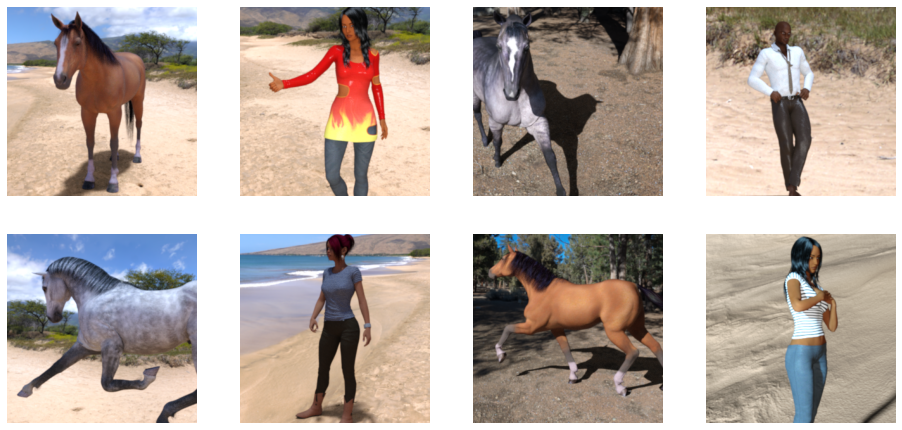

In [8]:
fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 4)
for i in range(8):
  if(i%2==0):
    horse_pic=os.path.join(train_horse_dir,train_horse_names[i])
    img=mpimg.imread(horse_pic)
  else:
    human_pic=os.path.join(train_human_dir,train_human_names[i])
    img=mpimg.imread(human_pic)  
  plt.subplot(4, 4, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.grid('false')

In [9]:
train_gen=ImageDataGenerator(rescale=1./255)
train_generator=train_gen.flow_from_directory('/tmp/horse-or-human',
                                              target_size=(300,300),
                                              batch_size=128,
                                              class_mode='binary'      
)

Found 1027 images belonging to 2 classes.


In [10]:
model=keras.models.Sequential([keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation='relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Conv2D(32,(3,3),activation='relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Conv2D(64,(3,3),activation='relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Conv2D(64,(3,3),activation='relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Conv2D(64,(3,3),activation='relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Flatten(),
                              keras.layers.Dense(512,activation='relu'),
                              keras.layers.Dense(1,activation='sigmoid')  ]
    
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [13]:
history=model.fit(train_generator,
                  steps_per_epoch=8,
                  epochs=15,
                  verbose=1)

Epoch 1/15
8/8 [==============================] - 5s 675ms/step - loss: 0.7381 - accuracy: 0.4994
Epoch 2/15
8/8 [==============================] - 6s 746ms/step - loss: 1.6055 - accuracy: 0.7130
Epoch 3/15
8/8 [==============================] - 6s 753ms/step - loss: 0.3417 - accuracy: 0.8576
Epoch 4/15
8/8 [==============================] - 6s 750ms/step - loss: 0.4046 - accuracy: 0.8276
Epoch 5/15
8/8 [==============================] - 6s 758ms/step - loss: 0.1200 - accuracy: 0.9588
Epoch 6/15
8/8 [==============================] - 6s 749ms/step - loss: 0.4283 - accuracy: 0.8509
Epoch 7/15
8/8 [==============================] - 7s 837ms/step - loss: 0.0990 - accuracy: 0.9629
Epoch 8/15
8/8 [==============================] - 6s 737ms/step - loss: 0.0472 - accuracy: 0.9844
Epoch 9/15
8/8 [==============================] - 6s 712ms/step - loss: 0.0513 - accuracy: 0.9822
Epoch 10/15
8/8 [==============================] - 6s 731ms/step - loss: 0.2861 - accuracy: 0.8843
Epoch 11/15
8/8 [==

In [15]:
from google.colab import files
from keras.preprocessing import image

In [50]:
uploaded=files.upload()


Saving actor.jpg to actor (1).jpg


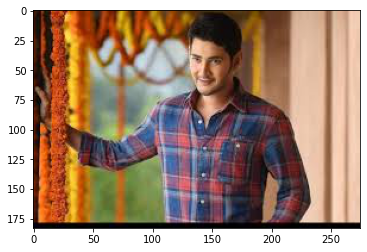

In [51]:
for fn in uploaded.keys():
  img=mpimg.imread('/content/'+fn)
  plt.imshow(img)

In [52]:
for fn in uploaded.keys():
  img=image.load_img('/content/'+fn,target_size=(300,300))
  x=image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #x=x.reshape((1,)_x.shape)
  print(x.shape)
  x=x/255
  classes=model.predict(x,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 


(1, 300, 300, 3)
[0.858063]
actor.jpg is a human


VISUALIZING INTERMEDIATE REPRESENTATIONS

In [53]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

In [54]:
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


In [55]:
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


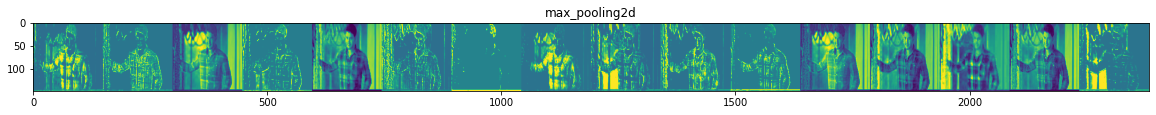

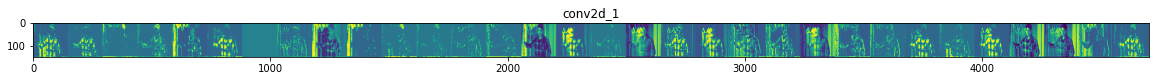

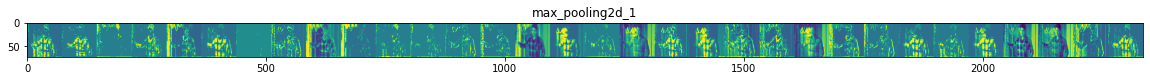

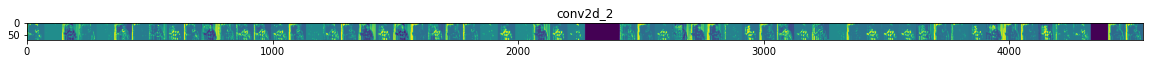

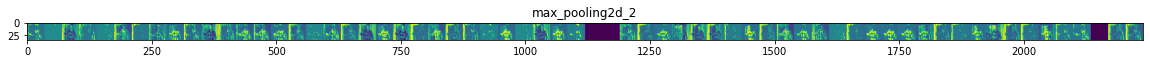

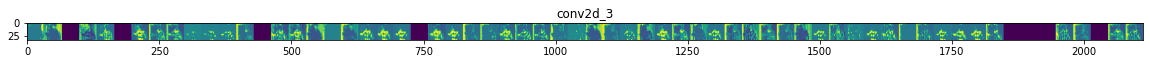

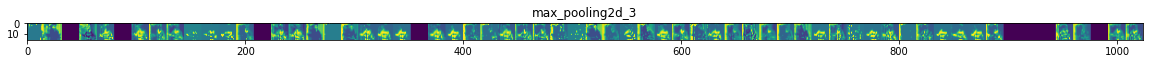

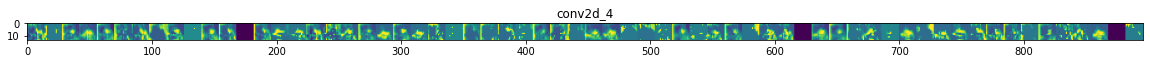

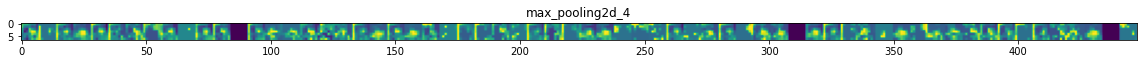

In [57]:

img = load_img('/content/'+fn,target_size=(300,300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')